In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as pltSequential
import seaborn as sns

In [2]:
DATADIR = 'Dataset2'

IMAGE_SIZE = [128, 128]
 
train_path = DATADIR+'/train'
valid_path = DATADIR+'/test'

In [3]:
labels = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']

In [4]:
xception = Xception(input_shape=IMAGE_SIZE + [3], 
              weights='imagenet',
              include_top=False)

In [5]:
for layer in xception.layers:
    layer.trainable = False

In [6]:
num_classes = glob("Dataset2/train/*")
num_classes

print(len(num_classes))

8


In [7]:
x = Flatten()(xception.output)
prediction = Dense(len(num_classes), activation='softmax')(x)
model = Model(inputs=xception.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                              

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 16, 16, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_2 (Conv2D)              (None, 8, 8, 728)    186368      ['add_1[0][0]']                  
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 8, 8, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 8, 8, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 8, 8, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 8, 8, 728)   0           ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 8, 8, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 8, 8, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 8, 8, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 8, 8, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (Add)                   (None, 8, 8, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_9[0][0]']                  
                                                                                                  
 block13_sepconv1_act (Activati  (None, 8, 8, 728)   0           ['add_10[0][0]']                 
 on)      

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
  )

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   )
 
test_datagen = ImageDataGenerator(rescale = 1./255
                                  )
 
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (IMAGE_SIZE),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
 
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (IMAGE_SIZE),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6623 images belonging to 8 classes.
Found 953 images belonging to 8 classes.


In [10]:
history = model.fit(
    training_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/50
207/207 [==============================] - 41s 159ms/step - loss: 1.0613 - accuracy: 0.6662 - val_loss: 0.8461 - val_accuracy: 0.7156
Epoch 2/50
207/207 [==============================] - 28s 135ms/step - loss: 0.7424 - accuracy: 0.7669 - val_loss: 0.7442 - val_accuracy: 0.7440
Epoch 3/50
207/207 [==============================] - 28s 133ms/step - loss: 0.6929 - accuracy: 0.7951 - val_loss: 0.6622 - val_accuracy: 0.7650
Epoch 4/50
207/207 [==============================] - 28s 134ms/step - loss: 0.6264 - accuracy: 0.8075 - val_loss: 0.5942 - val_accuracy: 0.7880
Epoch 5/50
207/207 [==============================] - 28s 133ms/step - loss: 0.6141 - accuracy: 0.8172 - val_loss: 0.6125 - val_accuracy: 0.7828
Epoch 6/50
207/207 [==============================] - 27s 133ms/step - loss: 0.6128 - accuracy: 0.8217 - val_loss: 0.5689 - val_accuracy: 0.8164
Epoch 7/50
207/207 [==============================] - 28s 135ms/step - loss: 0.5446 - accuracy: 0.8381 - val_loss: 0.5793 - val_ac

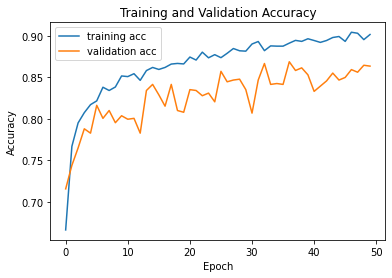

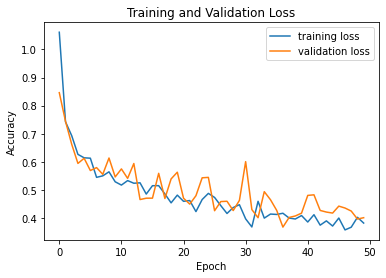

In [11]:
import matplotlib.pyplot as plt
# plot the accuracy
plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')
 
# plot the loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

In [12]:
model.evaluate(test_set)

30/30 [==============================] - 1s 47ms/step - loss: 0.4009 - accuracy: 0.8636


[0.40086549520492554, 0.8635886907577515]

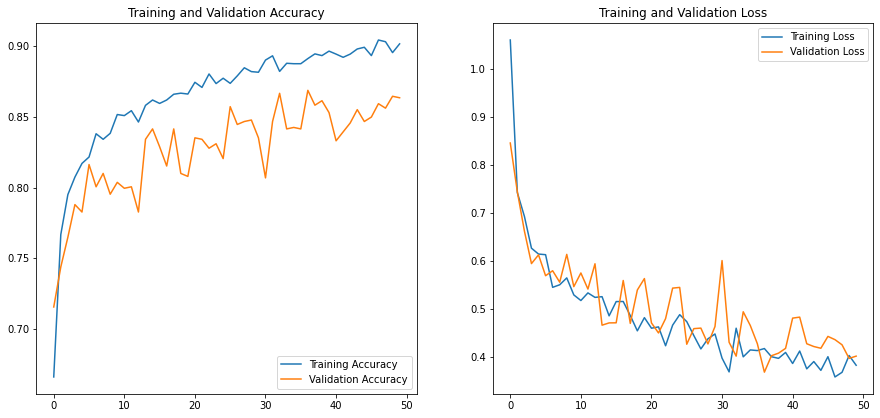

30/30 [==============================] - 2s 55ms/step
              precision    recall  f1-score   support

         2S1       0.10      0.12      0.11       118
      BRDM_2       0.13      0.09      0.11       142
      BTR_60       0.12      0.10      0.11       136
          D7       0.09      0.07      0.08        58
       SLICY       0.20      0.20      0.20       127
         T62       0.11      0.13      0.12       116
      ZIL131       0.13      0.15      0.14       115
    ZSU_23_4       0.18      0.21      0.19       141

    accuracy                           0.14       953
   macro avg       0.13      0.13      0.13       953
weighted avg       0.14      0.14      0.14       953

[[14 13 18  3 14 16 21 19]
 [22 13 15  6 18 29 16 23]
 [18 18 14  9 19 21 13 24]
 [10  5  7  4  8  2 11 11]
 [20  9 12  6 26 18 18 18]
 [15 16 18  5 13 15 13 21]
 [19  9 16  3 12 15 17 24]
 [18 15 19  7 17 15 20 30]]


C:\Users\Chlangdiam Sumer\AppData\Local\Temp\ipykernel_19088\3361309838.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Chlangdiam Sumer\AppData\Local\Temp\ipykernel_19088\3361309838.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


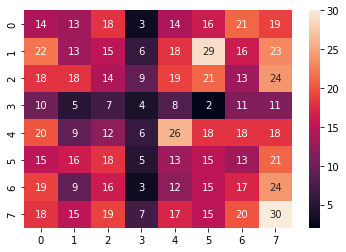

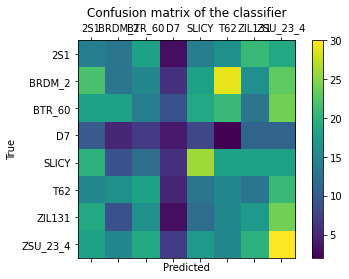

ValueError: Found input variables with inconsistent numbers of samples: [6623, 953]

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

from sklearn.metrics import classification_report
import seaborn as sns
predictions = np.argmax(model.predict(test_set), axis=-1)
from sklearn.metrics import confusion_matrix
print(classification_report(test_set.classes, predictions, target_names = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']))

cm = confusion_matrix(test_set.classes, predictions) 
sns.heatmap(cm, annot= True, fmt='d')

print(cm) 

fig = plt.figure() 

ax = fig.add_subplot(111) 

cax = ax.matshow(cm) 

plt.title('Confusion matrix of the classifier') 

fig.colorbar(cax) 

ax.set_xticklabels([''] + labels) 

ax.set_yticklabels([''] + labels) 

plt.xlabel('Predicted') 

plt.ylabel('True') 

plt.show()





print(classification_report(training_set.classes, predictions, target_names = ['2S1','BRDM_2','BTR_60','D7','SLICY','T62','ZIL131','ZSU_23_4']))